## Basic Time Series Analysis 

### Filter & Smoothing

In [1]:
import pandas as pd
import numpy as np
from statsmodels.tsa.seasonal import seasonal_decompose

# for plotting
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib
import pylab
import matplotlib.dates as mdates

In [2]:
airline_data = pd.read_csv('international-airline-passengers.csv')
airline_data.columns = ['Month', 'Passengers']
airline_data.tail()

,Month,Passengers
140,1960-09,508.0
141,1960-10,461.0
142,1960-11,390.0
143,1960-12,432.0
144,International airline passengers: monthly tota...,NaN


In [3]:
airline_data = airline_data[:-1] # drop last entry
airline_data.tail()

,Month,Passengers
139,1960-08,606.0
140,1960-09,508.0
141,1960-10,461.0
142,1960-11,390.0
143,1960-12,432.0


In [4]:
airline_data.head()

,Month,Passengers
0,1949-01,112.0
1,1949-02,118.0
2,1949-03,132.0
3,1949-04,129.0
4,1949-05,121.0


### 1) Create a date-time index for the data and plot the time series

In [5]:
airline_data['Month'] = pd.to_datetime(airline_data['Month'], format='%Y-%m')
data = airline_data.set_index(pd.DatetimeIndex(airline_data['Month']))
data = data.drop(['Month'], axis=1)
#data.head()

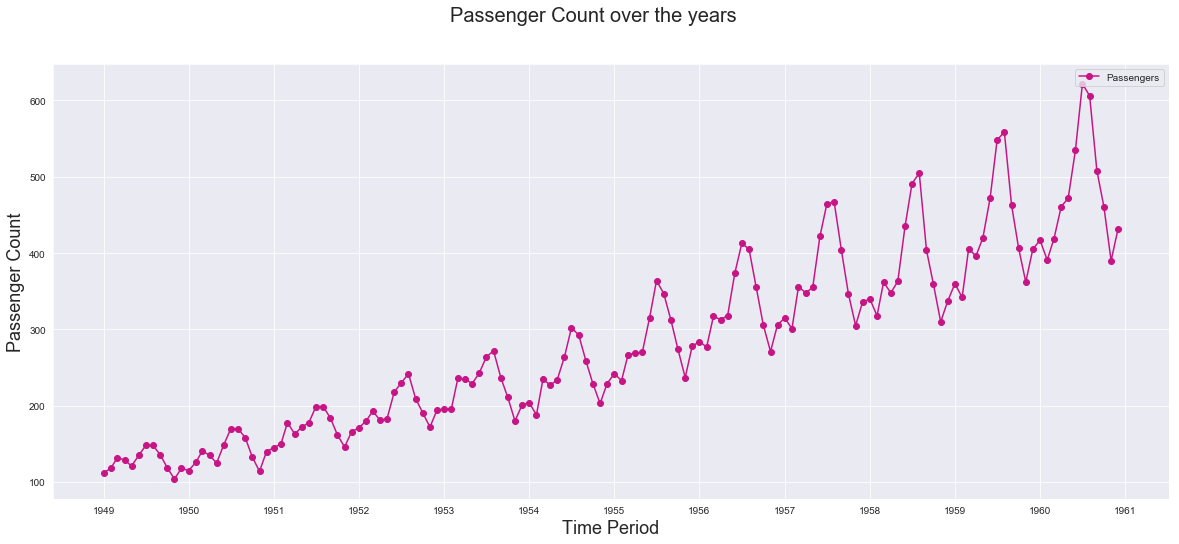

In [6]:
# Plotting
years = mdates.YearLocator()   # every year
months = mdates.MonthLocator()  # every month
yearsFmt = mdates.DateFormatter('%Y')

sns.set_style("darkgrid")
fig = plt.figure(figsize=(20,8))
ax = fig.add_subplot(111)

# plot the trends
plt.plot('Month', 'Passengers', data=airline_data, marker='o', color='mediumvioletred')

# format plots
fig.suptitle('Passenger Count over the years', fontsize=20)
plt.xlabel('Time Period', fontsize=18)
plt.ylabel('Passenger Count', fontsize=18)
pylab.legend(loc='upper right')
ax.get_yaxis().set_major_formatter(
    matplotlib.ticker.FuncFormatter(lambda y, p: format(int(y), ',')))

# format the ticks
ax.xaxis.set_major_locator(years)
ax.xaxis.set_major_formatter(yearsFmt)
ax.xaxis.set_minor_locator(months)

# display
plt.show()

### 2) Use seasonal decompose from statsmodels to show the the trend, seasonality and random components, as well as, the original series

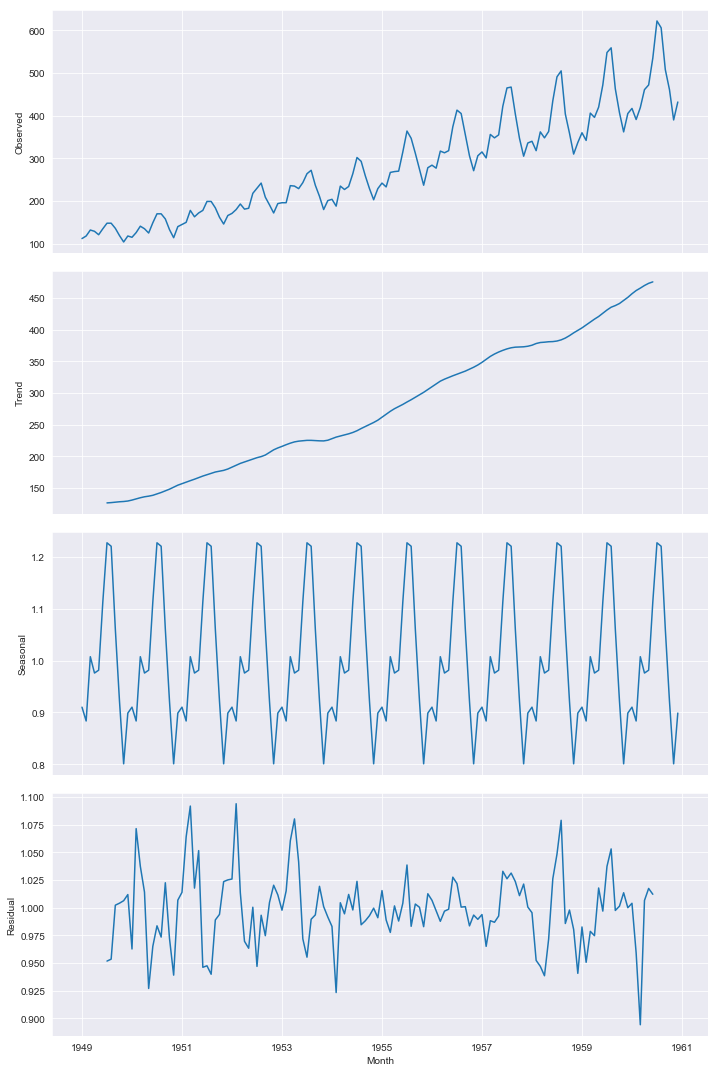

In [7]:
from pylab import rcParams
rcParams['figure.figsize'] = 10,15

#Assuming the model is multiplicative
result = seasonal_decompose(data, model='multiplicative')
result.plot()
plt.show()

### 3) Plot 3, 6 and 12 month moving averages overlaid on the original series

In [8]:
#Number of rows in the airline data frame-
#n = len(data)
data['3_mth_avg'] = data['Passengers'].rolling(3).mean()
data['6_mth_avg'] = data['Passengers'].rolling(6).mean()
data['12_mth_avg'] = data['Passengers'].rolling(12).mean()
#data.head(20)

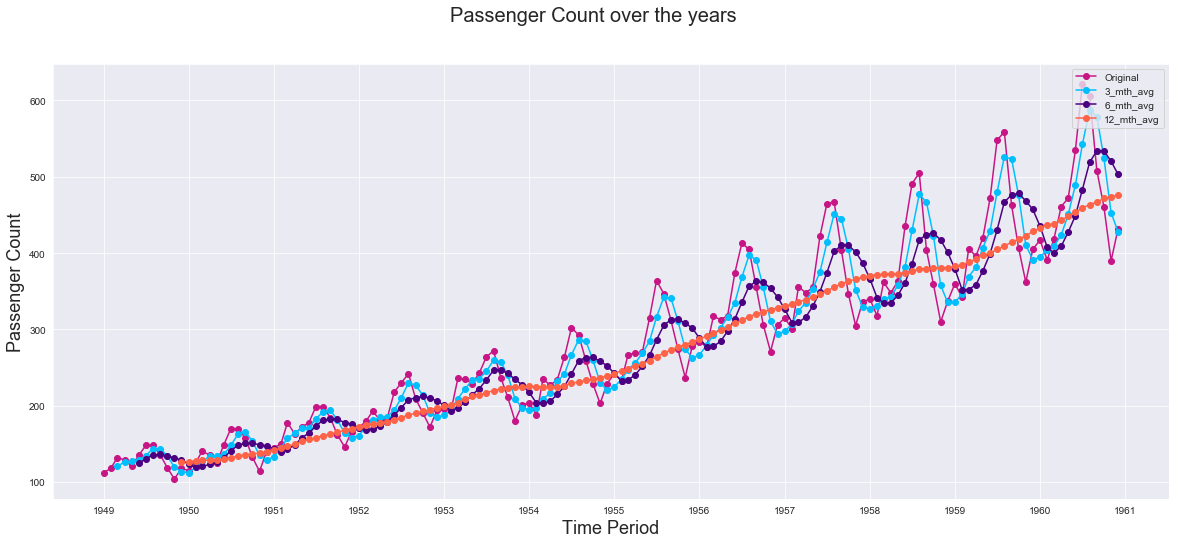

In [9]:
# Plotting
years = mdates.YearLocator()   # every year
months = mdates.MonthLocator()  # every month
yearsFmt = mdates.DateFormatter('%Y')

fig = plt.figure(figsize=(20,8))
ax = fig.add_subplot(111)
sns.set_style("darkgrid")
data = data.reset_index()

# plot the trends
plt.plot('Month', 'Passengers', data=data, marker='o',label = 'Original',color='mediumvioletred')
plt.plot('Month', '3_mth_avg', data=data, marker='o', color='deepskyblue')
plt.plot('Month', '6_mth_avg', data=data, marker='o', color='indigo')
plt.plot('Month', '12_mth_avg', data=data, marker='o', color='tomato')

# format plots
fig.suptitle('Passenger Count over the years', fontsize=20)
plt.xlabel('Time Period', fontsize=18)
plt.ylabel('Passenger Count', fontsize=18)
pylab.legend(loc='upper right')
ax.get_yaxis().set_major_formatter(
    matplotlib.ticker.FuncFormatter(lambda y, p: format(int(y), ',')))

# format the ticks
ax.xaxis.set_major_locator(years)
ax.xaxis.set_major_formatter(yearsFmt)
ax.xaxis.set_minor_locator(months)

# display
plt.show()

### 4) Plot differences of 1, 3, 6, and 12 months overlaid on the original series

In [10]:
airline_data['1_mth_diff'] = airline_data['Passengers'] - airline_data['Passengers'].shift(1)
airline_data['3_mth_diff'] = airline_data['Passengers'] - airline_data['Passengers'].shift(3)
airline_data['6_mth_diff'] = airline_data['Passengers'] - airline_data['Passengers'].shift(6)
airline_data['12_mth_diff'] = airline_data['Passengers'] - airline_data['Passengers'].shift(12)
#airline_data.head(20)

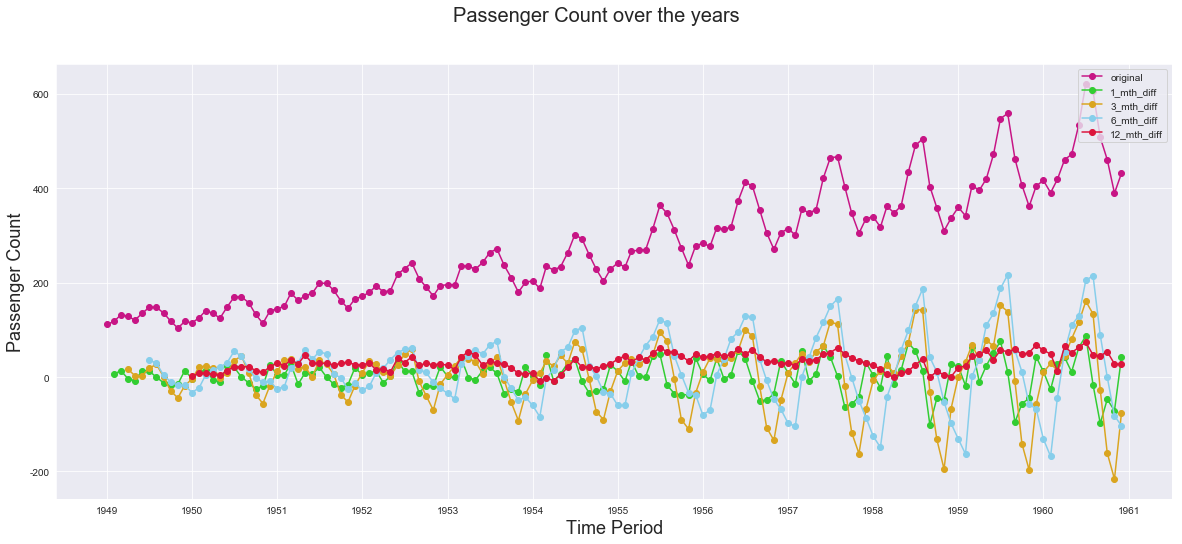

In [11]:
# Plotting
years = mdates.YearLocator()   # every year
months = mdates.MonthLocator()  # every month
yearsFmt = mdates.DateFormatter('%Y')

fig = plt.figure(figsize=(20,8))
ax = fig.add_subplot(111)
sns.set_style("darkgrid")

# plot the trends
plt.plot('Month', 'Passengers', data=airline_data, marker='o', label = 'original', color='mediumvioletred')
plt.plot('Month', '1_mth_diff', data=airline_data, marker='o', color='limegreen')
plt.plot('Month', '3_mth_diff', data=airline_data, marker='o', color='goldenrod')
plt.plot('Month', '6_mth_diff', data=airline_data, marker='o', color='skyblue')
plt.plot('Month', '12_mth_diff', data=airline_data, marker='o', color='crimson')

# format plots
fig.suptitle('Passenger Count over the years', fontsize=20)
plt.xlabel('Time Period', fontsize=18)
plt.ylabel('Passenger Count', fontsize=18)
pylab.legend(loc='upper right')
ax.get_yaxis().set_major_formatter(
    matplotlib.ticker.FuncFormatter(lambda y, p: format(int(y), ',')))

# format the ticks
ax.xaxis.set_major_locator(years)
ax.xaxis.set_major_formatter(yearsFmt)
ax.xaxis.set_minor_locator(months)

# display
plt.show()

### 5) Plot the simple exponential moving average overlaid on the original series

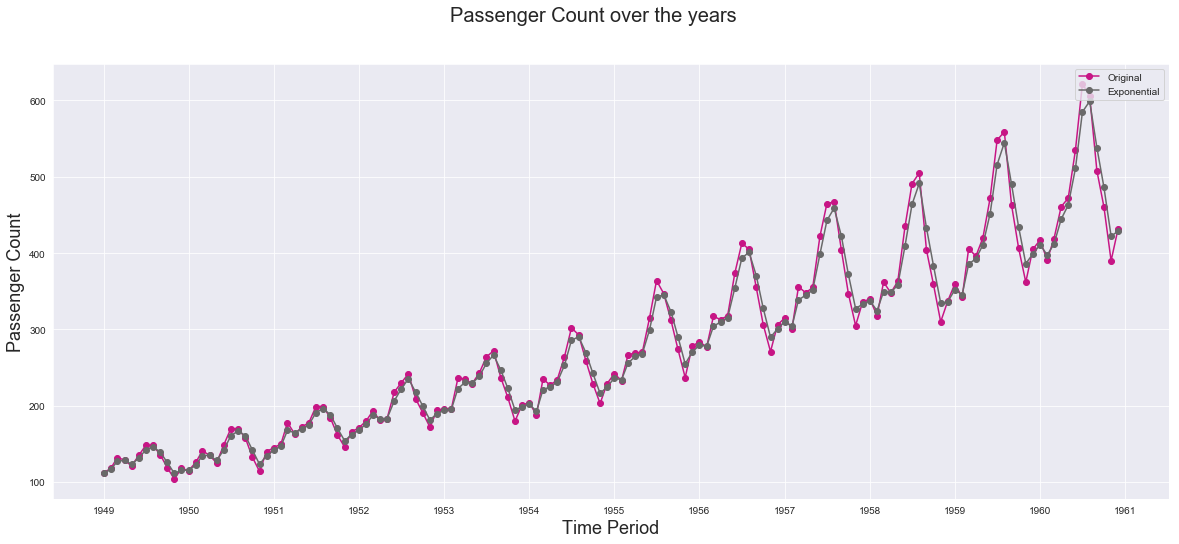

In [12]:
# Plotting
years = mdates.YearLocator()
months = mdates.MonthLocator()
yearsFmt = mdates.DateFormatter('%Y')

fig = plt.figure(figsize=(20,8))
ax = fig.add_subplot(111)
sns.set_style("darkgrid")
data = data.set_index(['Month'])
data = data.drop(['3_mth_avg','6_mth_avg','12_mth_avg'], axis=1)

# plot the trends
plt.plot(data.index, 'Passengers', data=data, marker='o', color='mediumvioletred',label = 'Original')
plt.plot(data.index, 'Passengers', data=data.ewm(com = 0.5).mean(), marker='o', color='dimgrey',label = 'Exponential')

# format plots
fig.suptitle('Passenger Count over the years', fontsize=20)
plt.xlabel('Time Period', fontsize=18)
plt.ylabel('Passenger Count', fontsize=18)
pylab.legend(loc='upper right')
ax.get_yaxis().set_major_formatter(
    matplotlib.ticker.FuncFormatter(lambda y, p: format(int(y), ',')))

# format the ticks
ax.xaxis.set_major_locator(years)
ax.xaxis.set_major_formatter(yearsFmt)
ax.xaxis.set_minor_locator(months)

# display
plt.show()